In [1]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.image as mpimg

In [2]:
img=mpimg.imread('Hamburg.jpg')
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
A = rgb2gray(img)

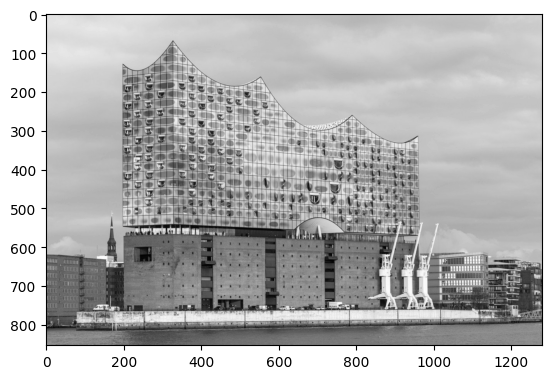

In [3]:
pl.imshow(A, cmap=pl.get_cmap('gray'), interpolation='bilinear')

173278.91154023138 3.726596540629823


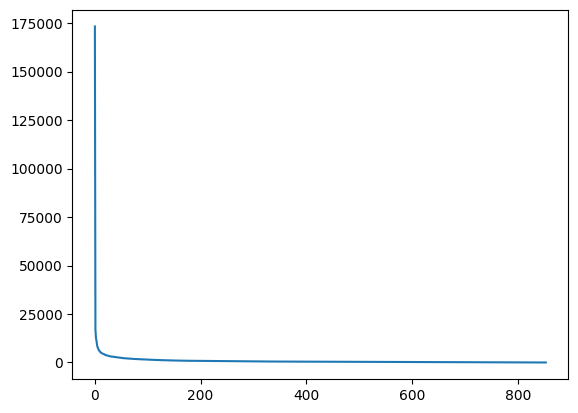

In [4]:
U, S, Vh = np.linalg.svd(A, full_matrices=True)
Sf=np.zeros((U.shape[0], Vh.shape[1]))
Sf[np.diag_indices(U.shape[0])]=S
pl.plot(S)
print(max(S), min(S))

In [5]:
def ne(k):
    return A.shape[0]*k+k+A.shape[1]*k

fd=A.shape[0]*A.shape[1]

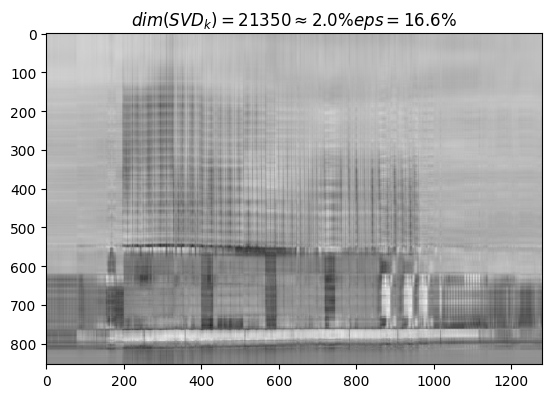

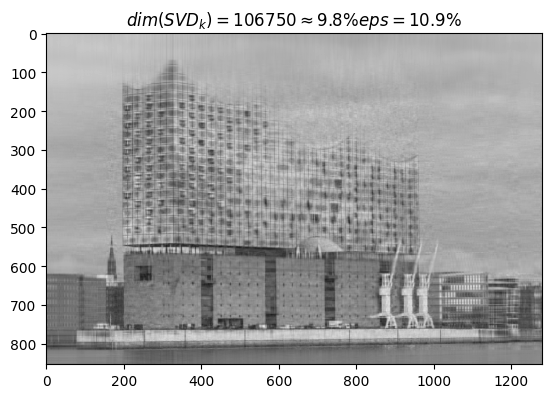

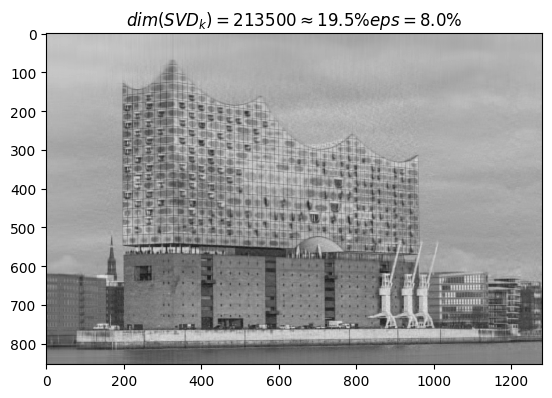

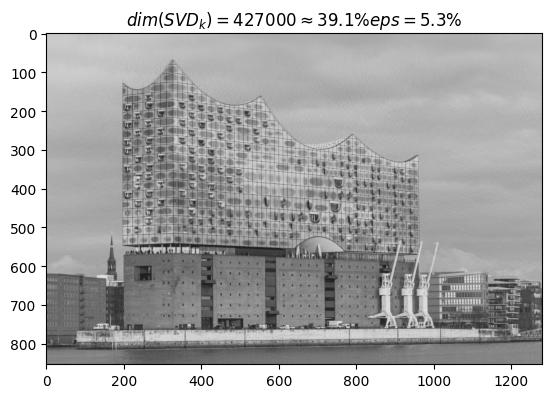

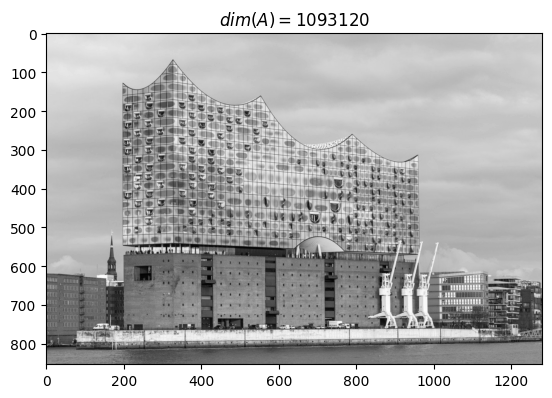

In [6]:
for k in [10,50,100, 200]:
    X = U[:,:k].dot(np.diag(S[:k])).dot(Vh[:k,:])
    rele=np.linalg.norm(S[k:])/np.linalg.norm(S)
    _=pl.figure()
    title_str="dim(SVD_k)="+str(ne(k))
    title_str+="\\approx"+"{:.1f}".format(ne(k)/fd*100)+"\%"
    title_str+="eps="+"{:.1f}".format(rele*100)+"\%"
    _=pl.title(r"$"+title_str+"$")
    _=pl.imshow(X, cmap=pl.get_cmap('gray'), interpolation='bilinear')
_=pl.figure()
title_str="dim(A)="+str(fd)
_=pl.title(r"$"+title_str+"$")
_=pl.imshow(A, cmap=pl.get_cmap('gray'), interpolation='bilinear')